In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time

# MACHINE LEARNING PROJECT - YORO Giovanny & SIMON Alexis

Here, we decided to detect if there is an attack or not.

# -- PART 1 : DATA ANALYSIS, FEATURES ENGINEERING & SELECTION---

In order to do the predictions, the first step is to study our dataset by visualizing it with differents figures like scatterplots, boxplots and histograms.

For that, we need to make the relevant pre-processing of our data to manage the missing data, the uniformative variables, to encode the categorical values and standardizing the quantitative variables.

Hence, we determine the variables we will use on our prediction algorithms and the uniformative variables.

In [2]:
#We open the X_train.csv

#To separate the fields in each column, you have to go on Excel, select the menu Data then Convert using the ',' as separator
braktooth_data = pd.read_csv('X_train.csv', sep=";")

# We look at the shape

print(braktooth_data.shape)

#Here we don't have duplicated rows or columns

(6402, 5)


In [3]:
#Getting the values into a matrix
data = braktooth_data.values

In [4]:
#Getting the list of protocols of the file

protocols = []
for i in range (data.shape[0]):
    p = data[i][0]
    found = False
    for j in range(len(protocols)):
        if protocols[j] == p:
            found = True
            break
    if found == False:
        protocols.append(p)
print(protocols)
    

['HCI_EVT', 'HCI_CMD', 'HCI H4 Broadcom', 'LMP', 'Baseband', 'L2CAP', 'SDP', 'BNEP', 'RFCOMM', 'OBEX']


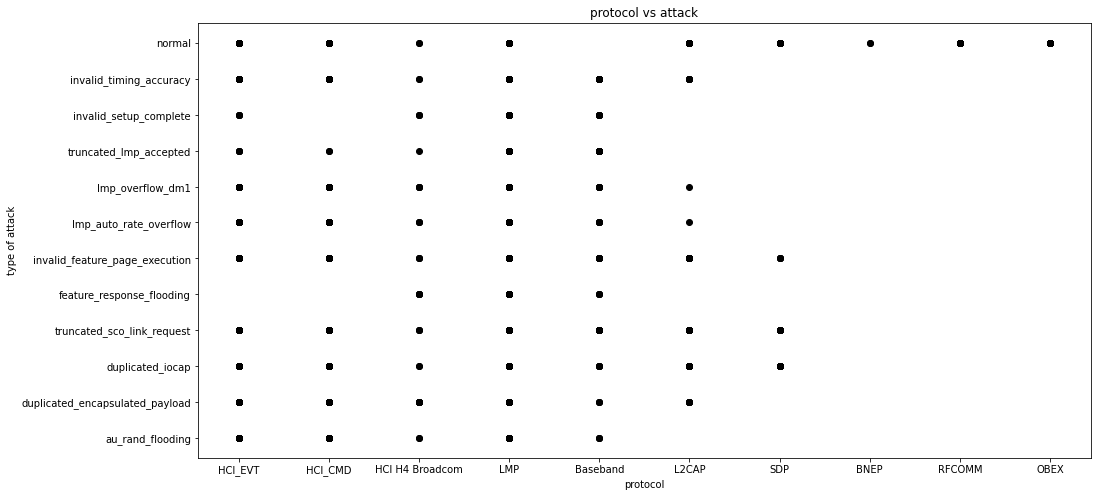

In [5]:
# Getting each category into a variable
protocols = data[:, 0]
infos = data[:,1]
length = data[:,2]
delta = data[:,3]
attack = data[:,4]

#Visualizing protocol data, depending on protocols and types of attack
plt.figure("Visualize protocol data",figsize=(16,8))
plt.scatter(protocols, attack,  color='black')
plt.xlabel('protocol')
plt.ylabel('type of attack')
plt.title('protocol vs attack')
plt.show()

(array([9.640e+02, 2.870e+02, 3.700e+01, 1.546e+03, 7.800e+01, 2.310e+02,
        4.400e+01, 2.000e+00, 6.380e+02, 2.575e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

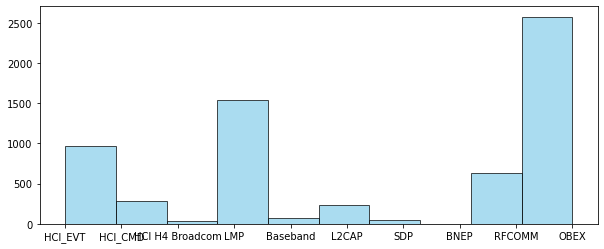

In [6]:
#Histogram of protocols
plt.figure(figsize=(10,4))
plt.hist(protocols, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

array([[<AxesSubplot:title={'center':'au_rand_flooding'}>,
        <AxesSubplot:title={'center':'duplicated_encapsulated_payload'}>,
        <AxesSubplot:title={'center':'duplicated_iocap'}>],
       [<AxesSubplot:title={'center':'feature_response_flooding'}>,
        <AxesSubplot:title={'center':'invalid_feature_page_execution'}>,
        <AxesSubplot:title={'center':'invalid_setup_complete'}>],
       [<AxesSubplot:title={'center':'invalid_timing_accuracy'}>,
        <AxesSubplot:title={'center':'lmp_auto_rate_overflow'}>,
        <AxesSubplot:title={'center':'lmp_overflow_dm1'}>],
       [<AxesSubplot:title={'center':'normal'}>,
        <AxesSubplot:title={'center':'truncated_lmp_accepted'}>,
        <AxesSubplot:title={'center':'truncated_sco_link_request'}>]],
      dtype=object)

<Figure size 504x504 with 0 Axes>

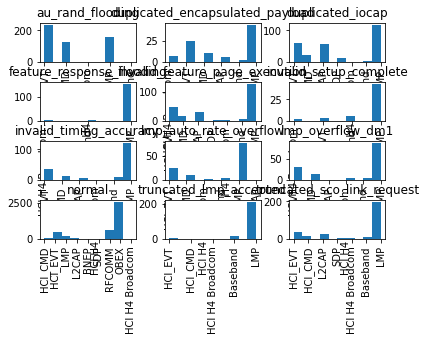

In [7]:
plt.figure(figsize=(7,7))
braktooth_data.hist('Protocol', by = 'Type')
# protocoles en fonction du type d'attaque, si on a des histogrammes similaires, il peut être intéressant de conserver la variable
# Par exemple, on constate que le 5e et le 9e histogramme sont similaires. Il est donc utile de conserver la variable protocole.
# Ainsi on peut déterminer les variables qui sont utiles pour nos algorithmes de prédiction.

(array([ 620.,  277.,  304.,  161.,  239.,  124.,  142.,  236.,   56.,
        4243.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

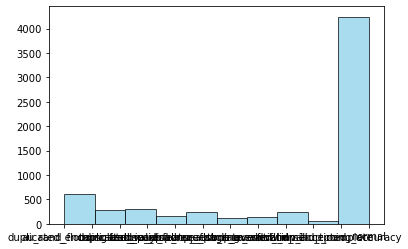

In [8]:
#Histogram of attacks
plt.hist(attack, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

In [9]:
#Transforming strings of categorical variables into number
from sklearn.preprocessing import OneHotEncoder

# To train machine learning algorithms, we need that all the data given are numerical. The protocol is a string so we use one-hot-
#encoding to transform strings into one-hot numbers. One hot Encoding is the best way to convert categorical data into binary vectors.

ohe = OneHotEncoder()
# We store the protocols into a matrix
protocols = braktooth_data[['Protocol']]
# Transforms protocols using one-hot encoding
protocol_transformed = ohe.fit_transform(protocols).toarray()
print(protocol_transformed)
print(ohe.categories_)


infos = braktooth_data[['Info']]
infos_transformed = ohe.fit_transform(infos).toarray()

types = braktooth_data[['Type']]
types_transformed = ohe.fit_transform(types).toarray() 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[array(['BNEP', 'Baseband', 'HCI H4 Broadcom', 'HCI_CMD', 'HCI_EVT',
       'L2CAP', 'LMP', 'OBEX', 'RFCOMM', 'SDP'], dtype=object)]


<AxesSubplot:xlabel='Length', ylabel='Type'>

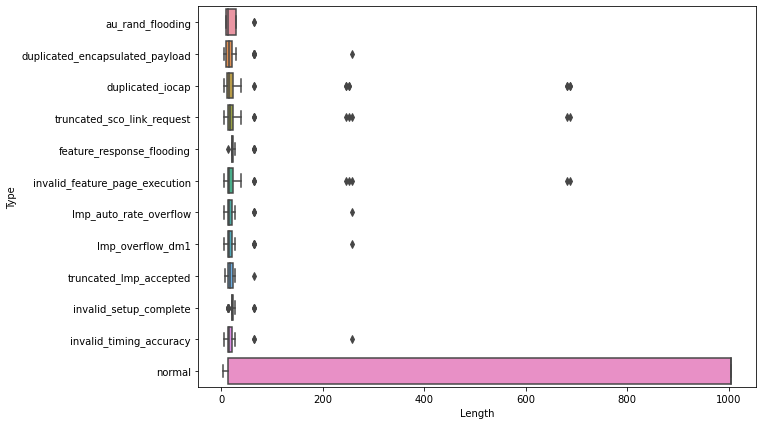

In [35]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data=braktooth_data, x='Length', y='Type')

<AxesSubplot:>

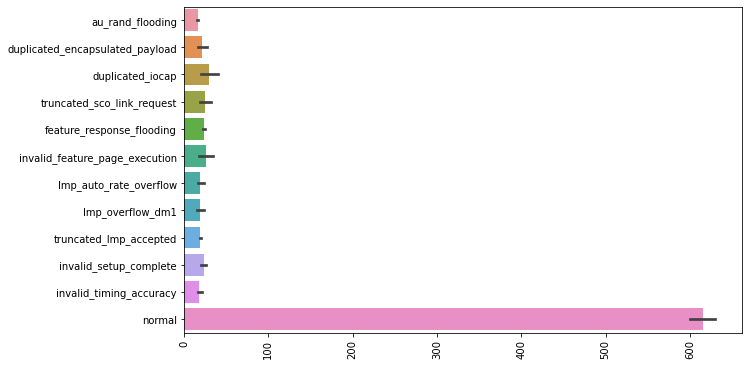

In [36]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=length,y=attack)

In [37]:
#Standardizing quantitative variables
from sklearn.preprocessing import StandardScaler

# To improve the performance of machine learning models, facilitate the interpretation of coefficients
# and ensure that the variables are on the same scale, we standardize the quantitative variables
scaler = StandardScaler()

delta_bi = delta.reshape(-1,1)
length_bi = length.reshape(-1,1)

# This step computes and stores the mean and standard deviation of the dataset
scaler.fit(delta_bi)

# Perform standardization by centering and scaling
d_scale = scaler.transform(delta_bi)

scaler.fit(length_bi)
l_scale = scaler.transform(length_bi)

print(d_scale)
print(l_scale)

[[-0.00644571]
 [-0.00644571]
 [-0.00195723]
 ...
 [-0.00402289]
 [-0.01064642]
 [-0.01198693]]
[[-0.81367153]
 [-0.81157827]
 [-0.81367153]
 ...
 [-0.78855247]
 [-0.69854252]
 [-0.69854252]]


In [38]:
#Gathering all the results into a matrix. We need all the data to perform the machine learning algorithms.

final_matrix = np.random.rand(protocol_transformed.shape[0],12)

#Merge the matrix protocol transformed, l_scale and d_scale
final_matrix = np.hstack((protocol_transformed[:,:8], l_scale, d_scale))

print(final_matrix)
print(protocol_transformed.shape)

[[ 0.          0.          0.         ...  0.         -0.81367153
  -0.00644571]
 [ 0.          0.          0.         ...  0.         -0.81157827
  -0.00644571]
 [ 0.          0.          0.         ...  0.         -0.81367153
  -0.00195723]
 ...
 [ 0.          0.          0.         ...  1.         -0.78855247
  -0.00402289]
 [ 0.          0.          0.         ...  0.         -0.69854252
  -0.01064642]
 [ 0.          0.          0.         ...  0.         -0.69854252
  -0.01198693]]
(6402, 10)


# --- PART 2 : THE ALGORITHMS & MODEL SELECTION ---

We'll try to train our data on different algorithms first by creating a test set for the X_train.csv and secondly by reading the data of X_test.csv

We want to detect if there was an attack or not (classification problem), so we need classification algorithms.

There are too many methods to try them all. We used some algorithms we studied, from the simplest to the most complex as per the Occam's Razor principle.

We'll then choose the best algorithm by comparing the different models.

We want to predict if there is an attack or not.

So, here we put on X the transformed matrix composed of values of 'Protocol', 'Length' and 'Delta', the informative variables.
And on Y, we put the variable we want to predict, 'Type'.

In [39]:
# Separating dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Dividing the state of a data into two values, 1 when there is an attack, 0 when no attack
braktooth_data['Target'] = (braktooth_data['Type'] == 'normal').astype(int)

X = final_matrix # data of the variables protocol, length and delta
y = braktooth_data['Target'] #data of attack
"""
Split a dataset into two a training set and a testing set
Input:
    X, the feature matrix of the dataset
    y, the target variable of the dataset
    test_size, the proportion of the dataset that should be allocated to the testing set
    random_state, the randomness of the split

Output:
    X_train, the feature matrice for the training set
    X_test, the feature matrice for the testing set
    y_train, the target variable for the training set
    y_test, the target variables for the testing set
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

In [40]:
y.value_counts(normalize=True)



1    0.633396
0    0.366604
Name: Target, dtype: float64

We found out that the dataset was imbalanced.(Attack: 63%, No attack: 36%) As per the predictions, there are more attacks detected than normal types.

So, as per the course, we don't need to use the average score to observe the quality of the model.

Indeed, we prefer an algorithm which detects an attack when there is no attack instead of no attack when attack.

So we will opt for other metrics like recall and precision.

In [41]:
# Algorithm 1: Logistic regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=30000)
#Calculating the computation time while training the model (fit)
start = time()
model = LR.fit(X_train,y_train)
print('Took {} seconds'.format(time() - start))

Took 0.021079301834106445 seconds


In [42]:
#Quality of the models using different metrics
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, mean_absolute_percentage_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating the accuracy of the model

""" Calculating the accuracy of the model
    : y_train, the actual labels of the training dataset
    : y_pred_train, the predicted labels for the training datase
"""
accuracy_train = accuracy_score(y_train, y_pred_train)
print("(Accuracy) Exactitude du modèle de train:", accuracy_train)

""" Calculating the accuracy of the model
    : y_train, the actual labels of the testing dataset
    : y_pred_train, the predicted labels for the testing datase
"""

accuracy_test = accuracy_score(y_test, y_pred_test)
print("(Accuracy) Exactitude du modèle de test:", accuracy_test)

# Calculating the recall of the model
sensitivity_train = recall_score(y_train, y_pred_train)
print("(Sensitivity) Exactitude du modèle de train:", sensitivity_train)

sensitivity_test = recall_score(y_test, y_pred_test)
print("(Sensitivity) Exactitude du modèle de train:", sensitivity_test)

# Calculating the precision of the model

precision_train = precision_score(y_train, y_pred_train)
print("(Precision) Exactitude du modèle de train:", precision_train)

precision_test = precision_score(y_test, y_pred_test)
print("(Precision) Exactitude du modèle de train:", precision_test)

(Accuracy) Exactitude du modèle de train: 0.8701182771702745
(Accuracy) Exactitude du modèle de test: 0.8610098906819365
(Sensitivity) Exactitude du modèle de train: 0.8022479803301721
(Sensitivity) Exactitude du modèle de train: 0.7947019867549668
(Precision) Exactitude du modèle de train: 0.9917498914459401
(Precision) Exactitude du modèle de train: 0.9805924412665986


In [43]:
# Algorithm 2: Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Calculating the computation time while training the model (fit)
start = time()
lda = LDA().fit(X_train,y_train)
print('Took {} seconds'.format(time() - start))

Took 0.07375311851501465 seconds


In [44]:
y_pred_train = lda.predict(X_train)
y_pred_test = lda.predict(X_test)

# Quality of the model

accuracy_train = accuracy_score(y_train, y_pred_train)
print("(Accuracy) Exactitude du modèle de train:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("(Accuracy) Exactitude du modèle de test:", accuracy_test)

sensitivity_train = recall_score(y_train, y_pred_train)
print("(Sensitivity) Exactitude du modèle de train:", sensitivity_train)

sensitivity_test = recall_score(y_test, y_pred_test)
print("(Sensitivity) Exactitude du modèle de test:", sensitivity_test)

precision_train = precision_score(y_train, y_pred_train)
print("(Precision) Exactitude du modèle de train:", precision_train)

precision_test = precision_score(y_test, y_pred_test)
print("(Precision) Exactitude du modèle de test:", precision_test)

(Accuracy) Exactitude du modèle de train: 0.8696719482258425
(Accuracy) Exactitude du modèle de test: 0.8641332639250391
(Sensitivity) Exactitude du modèle de train: 0.8001404987706358
(Sensitivity) Exactitude du modèle de test: 0.793046357615894
(Precision) Exactitude du modèle de train: 0.9934583515045792
(Precision) Exactitude du modèle de test: 0.9886480908152735


In [45]:
#Algorihm 3 : K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
#Calculating the computation time while training the model (fit)
start = time()
knn.fit(X_train, y_train)
print('Took {} seconds'.format(time() - start))
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

Took 0.006040096282958984 seconds


In [46]:
#Quality of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
print("(Accuracy) Exactitude du modèle de train:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("(Accuracy) Exactitude du modèle de test:", accuracy_test)

sensitivity_train = recall_score(y_train, y_pred_train)
print("(Sensitivity) Exactitude du modèle de train:", sensitivity_train)

sensitivity_test = recall_score(y_test, y_pred_test)
print("(Sensitivity) Exactitude du modèle de test:", sensitivity_test)

precision_train = precision_score(y_train, y_pred_train)
print("(Precision) Exactitude du modèle de train:", precision_train)

precision_test = precision_score(y_test, y_pred_test)
print("(Precision) Exactitude du modèle de test:", precision_test)

(Accuracy) Exactitude du modèle de train: 0.9743360856951573
(Accuracy) Exactitude du modèle de test: 0.9578344612181156
(Sensitivity) Exactitude du modèle de train: 0.9726027397260274
(Sensitivity) Exactitude du modèle de test: 0.9594370860927153
(Precision) Exactitude du modèle de train: 0.9868139700641483
(Precision) Exactitude du modèle de test: 0.9731318219983207


In [47]:
# Now, let's try the previous transformations on the X_test.csv file
# The best algorithm used before is KNN. It has the best ratio between computation time and accuracy, precision and recall.

# Opening the test CSV file, select the first column, Excel -> Data -> Convert
test_dataset = pd.read_csv('X_test.csv', sep = ";")
print(test_dataset.shape)

(691, 4)


In [48]:
# Tranforming strings into numerical values with One Hot Encoder

protocols = test_dataset[['Protocol']]
protocol_transformed = ohe.fit_transform(protocols).toarray()
print(protocol_transformed)
print(ohe.categories_)


infos = test_dataset[['Info']]
infos_transformed = ohe.fit_transform(infos).toarray()

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[array(['Baseband', 'HCI H4 Broadcom', 'HCI_CMD', 'HCI_EVT', 'L2CAP',
       'LMP', 'OBEX', 'RFCOMM'], dtype=object)]


In [49]:
#Standardizing numerical values

test_data = test_dataset.values

length = test_data[:,2]
delta = test_data[:,3]

delta_bi = delta.reshape(-1,1)
length_bi = length.reshape(-1,1)

scaler.fit(delta_bi)
d_scale = scaler.transform(delta_bi)

scaler.fit(length_bi)
l_scale = scaler.transform(length_bi)

print(d_scale)
print(l_scale)

[[ 1.89019392e+00]
 [ 1.90696198e+00]
 [-1.26756872e-02]
 [-6.60136181e-03]
 [ 1.83199556e+00]
 [-2.55938080e-03]
 [ 1.83330450e+00]
 [-5.70278337e-03]
 [ 1.84429992e+00]
 [-1.14716244e-01]
 [-1.23436023e-01]
 [ 1.28978253e+01]
 [ 3.59785791e+00]
 [ 8.02988197e+00]
 [-1.14933590e-01]
 [-1.29889892e-01]
 [-1.29615777e-01]
 [-3.85933495e-02]
 [-1.28848580e-01]
 [ 2.06489201e-03]
 [-1.30079664e-01]
 [ 3.11826843e+00]
 [-1.31155039e-01]
 [ 2.96327500e+00]
 [-1.30043981e-01]
 [-1.30514356e-01]
 [-1.30042359e-01]
 [-1.28300349e-01]
 [-1.30970133e-01]
 [-1.28988070e-01]
 [-1.31189101e-01]
 [-1.10388794e-01]
 [-1.29627131e-01]
 [-1.31213430e-01]
 [ 9.47936457e-02]
 [-1.28735041e-01]
 [-1.30069933e-01]
 [-1.28941033e-01]
 [-1.29567118e-01]
 [-1.29406542e-01]
 [-1.29800683e-01]
 [-1.19254552e-01]
 [-1.31213430e-01]
 [-1.31075562e-01]
 [-1.26942750e-01]
 [-1.27340136e-01]
 [-1.28204652e-01]
 [-1.26329640e-01]
 [-1.29659571e-01]
 [-1.13841995e-01]
 [-1.31091782e-01]
 [-1.24229173e-01]
 [-1.3057599

In [50]:
# Gathering all the data into a matrix

final_matrix = np.random.rand(protocol_transformed.shape[0],12)

final_matrix = protocol_transformed[:, :10]

#Merge the matrix protocol transformed, l_scale and d_scale
final_matrix = np.hstack((protocol_transformed[:,:10], l_scale, d_scale))

print(final_matrix)
print(protocol_transformed.shape)

[[ 1.          0.          0.         ...  0.         -0.78737201
   1.89019392]
 [ 1.          0.          0.         ...  0.         -0.78737201
   1.90696198]
 [ 1.          0.          0.         ...  0.         -0.78737201
  -0.01267569]
 ...
 [ 0.          0.          1.         ...  0.         -0.82893055
  -0.13066033]
 [ 0.          0.          1.         ...  0.         -0.83516434
  -0.13145511]
 [ 0.          0.          1.         ...  0.         -0.83516434
  -0.0527338 ]]
(691, 8)


In [51]:
#Predicting if there is an attack or not on X_test
X_test = final_matrix # data of the variables protocol, length and delta
y_pred_test = knn.predict(X_test) # Prediction
print(y_pred_test.shape)
print(y_test.shape)

(691,)
(1921,)


So, we tried to apply the different algorithms to the data gathering the protocols, the lengths and the deltas.

It's done by separating the dataset into training and testing sets, fitting each algorithm and predicting some data on a test set.

We calculated the accuracy, the precision and the recall to get more information about the process.
We found out that the dataset was imbalanced.(Attack: 63%, No attack: 36%)

So, as per the course, we don't need to use the average score to observe the quality of the model.
Indeed, we prefer an algorithm which detects an attack when there is no attack instead of no attack when attack.
That's why we opted for other metrics like recall and precision.


We then calculated the computation time to find out the best one which is the KNN : an algorithm with a better score at the price of a much bigger computation time may not be the best choice.

The ratio between scores and computation time allows us to select the KNN algorithm which has the best scores (accuracy precision, recall) and the best computation time in comparison to the others algorithms.

Here we find out that the score computed on the test set is not higher than the score comptuted on the train set.

In [52]:
#Writing the results of the algorithm in a new file
# Here we store in the variable 'Type', the state 'attack' or 'no attack'

test_values = test_dataset.values
#print(test_values)

attacks = y_pred_test.reshape(-1,1)

full_matrix = np.hstack((test_values, attacks))
labels = ['Protocol', 'Info', 'Length', 'Delta', 'Type']

full_matrix_2 = np.vstack((labels, full_matrix))

In [53]:
#Remplacing the 1 and 0 by 'attack' and 'no attack'

def putting_attack(matrix):
    for i in range(1, matrix.shape[0]):
        #print(matrix[i][4])
        if matrix[i][4] == 0:
            matrix[i][4] = 'no attack'
        else:
            matrix[i][4] = 'attack'
    return matrix

In [54]:
full_matrix_2 = putting_attack(full_matrix_2)
#print(full_matrix_2)

In [55]:
#Writing the final matrix into a CSV file
import csv

with open('X_results.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerows(full_matrix_2)

Hence, via the prediction algorithms that we trained before on the ISOT Dataset, we are able to predict if there is some attack or not.